# NLTK Complete Guide - Section 11: Frequency Distribution

This notebook covers:
- FreqDist Basics
- Word Frequency Analysis
- Conditional Frequency Distribution
- Visualization
- Practical Applications

In [1]:
import nltk

nltk.download('punkt', quiet=True)
nltk.download('gutenberg', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('brown', quiet=True)
nltk.download('inaugural', quiet=True)

from nltk import FreqDist, ConditionalFreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg, stopwords, brown, inaugural

## 11.1 FreqDist Basics

**FreqDist** counts the frequency of each item in a collection.

In [2]:
text = "the cat sat on the mat the cat is fat"
tokens = word_tokenize(text)

# Create frequency distribution
fdist = FreqDist(tokens)

print(f"Text: {text}")
print(f"Tokens: {tokens}")
print(f"\nFrequency Distribution: {dict(fdist)}")

Text: the cat sat on the mat the cat is fat
Tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'cat', 'is', 'fat']

Frequency Distribution: {'the': 3, 'cat': 2, 'sat': 1, 'on': 1, 'mat': 1, 'is': 1, 'fat': 1}


In [3]:
# FreqDist properties and methods
print(f"Total words: {fdist.N()}")
print(f"Unique words: {fdist.B()}")
print(f"Most common: {fdist.most_common(3)}")
print(f"Frequency of 'the': {fdist['the']}")
print(f"Frequency of 'dog': {fdist['dog']}")

Total words: 10
Unique words: 7
Most common: [('the', 3), ('cat', 2), ('sat', 1)]
Frequency of 'the': 3
Frequency of 'dog': 0


In [4]:
# More methods
print(f"Max frequency word: {fdist.max()}")
print(f"Frequency of max: {fdist.freq(fdist.max()):.2%}")
print(f"\nAll items: {list(fdist.keys())}")
print(f"All counts: {list(fdist.values())}")

Max frequency word: the
Frequency of max: 30.00%

All items: ['the', 'cat', 'sat', 'on', 'mat', 'is', 'fat']
All counts: [3, 2, 1, 1, 1, 1, 1]


## 11.2 Analyzing Real Text

In [5]:
# Load Emma by Jane Austen
emma = gutenberg.words('austen-emma.txt')

print(f"Total words in Emma: {len(emma):,}")
print(f"Sample: {list(emma[:20])}")

Total words in Emma: 192,427
Sample: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich']


In [6]:
# Create frequency distribution
fdist_emma = FreqDist(emma)

print(f"Unique words: {fdist_emma.B():,}")
print(f"\nTop 20 most common words:")
print("-" * 30)

for word, count in fdist_emma.most_common(20):
    print(f"{word:<15} {count:>6}")

Unique words: 7,811

Top 20 most common words:
------------------------------
,                11454
.                 6928
to                5183
the               4844
and               4672
of                4279
I                 3178
a                 3004
was               2385
her               2381
;                 2199
it                2128
in                2118
not               2101
"                 2004
be                1970
she               1778
that              1730
you               1677
had               1606


In [7]:
# Filter: only alphabetic words, remove stopwords
stop_words = set(stopwords.words('english'))

filtered_words = [
    w.lower() for w in emma 
    if w.isalpha() and w.lower() not in stop_words
]

fdist_filtered = FreqDist(filtered_words)

print("Top 20 meaningful words (no stopwords):")
print("-" * 35)

for word, count in fdist_filtered.most_common(20):
    print(f"{word:<15} {count:>6}")

Top 20 meaningful words (no stopwords):
-----------------------------------
mr                1153
emma               865
could              837
would              820
mrs                699
miss               599
must               567
harriet            506
much               486
said               484
one                452
weston             440
every              435
well               401
thing              398
knightley          389
elton              385
think              383
little             359
never              358


## 11.3 Frequency Analysis Methods

In [8]:
# Hapaxes - words that appear only once
hapaxes = fdist_filtered.hapaxes()

print(f"Words appearing only once: {len(hapaxes):,}")
print(f"Percentage: {len(hapaxes)/fdist_filtered.B():.1%}")
print(f"\nSample hapaxes: {hapaxes[:20]}")

Words appearing only once: 2,736
Percentage: 39.4%

Sample hapaxes: ['austen', 'vex', 'indistinct', 'caresses', 'nominal', 'mildness', 'impose', 'esteeming', 'disadvantages', 'misfortunes', 'mournful', 'debt', 'tenderer', 'valetudinarian', 'amounting', 'equals', 'lieu', 'awoke', 'chatted', 'housemaid']


In [9]:
# Words with specific frequency
def words_with_freq(fdist, min_freq, max_freq=None):
    """Get words within frequency range"""
    if max_freq is None:
        max_freq = float('inf')
    return [w for w, f in fdist.items() if min_freq <= f <= max_freq]

# Words appearing exactly 5 times
freq_5 = words_with_freq(fdist_filtered, 5, 5)
print(f"Words appearing exactly 5 times: {len(freq_5)}")
print(f"Sample: {freq_5[:15]}")

# Words appearing 100+ times
freq_100_plus = words_with_freq(fdist_filtered, 100)
print(f"\nWords appearing 100+ times: {len(freq_100_plus)}")
print(f"Words: {freq_100_plus}")

Words appearing exactly 5 times: 304
Sample: ['supplied', 'shape', 'grief', 'third', 'black', 'devoted', 'attach', 'informed', 'november', 'thirty', 'mutual', 'animated', 'gratefully', 'horrible', 'flatter']

Words appearing 100+ times: 112
Words: ['emma', 'jane', 'woodhouse', 'home', 'happy', 'seemed', 'one', 'little', 'two', 'father', 'long', 'woman', 'miss', 'mr', 'friend', 'even', 'away', 'indeed', 'rather', 'much', 'way', 'think', 'well', 'many', 'however', 'came', 'first', 'day', 'thought', 'every', 'weston', 'man', 'always', 'morning', 'would', 'felt', 'last', 'soon', 'yet', 'pleasure', 'could', 'never', 'going', 'half', 'great', 'must', 'mrs', 'without', 'mind', 'body', 'though', 'time', 'hartfield', 'give', 'highbury', 'really', 'wish', 'till', 'made', 'ever', 'done', 'thing', 'say', 'said', 'poor', 'cannot', 'know', 'good', 'us', 'might', 'dear', 'shall', 'see', 'go', 'sure', 'like', 'may', 'take', 'upon', 'make', 'knightley', 'come', 'look', 'quite', 'sort', 'hope', 'better'

In [10]:
# Relative frequency (probability)
print("Relative Frequencies (Top 10):")
print("-" * 35)

for word, count in fdist_filtered.most_common(10):
    rel_freq = fdist_filtered.freq(word)
    print(f"{word:<15} {count:>6}  ({rel_freq:.2%})")

Relative Frequencies (Top 10):
-----------------------------------
mr                1153  (1.58%)
emma               865  (1.18%)
could              837  (1.14%)
would              820  (1.12%)
mrs                699  (0.96%)
miss               599  (0.82%)
must               567  (0.78%)
harriet            506  (0.69%)
much               486  (0.66%)
said               484  (0.66%)


## 11.4 Visualization

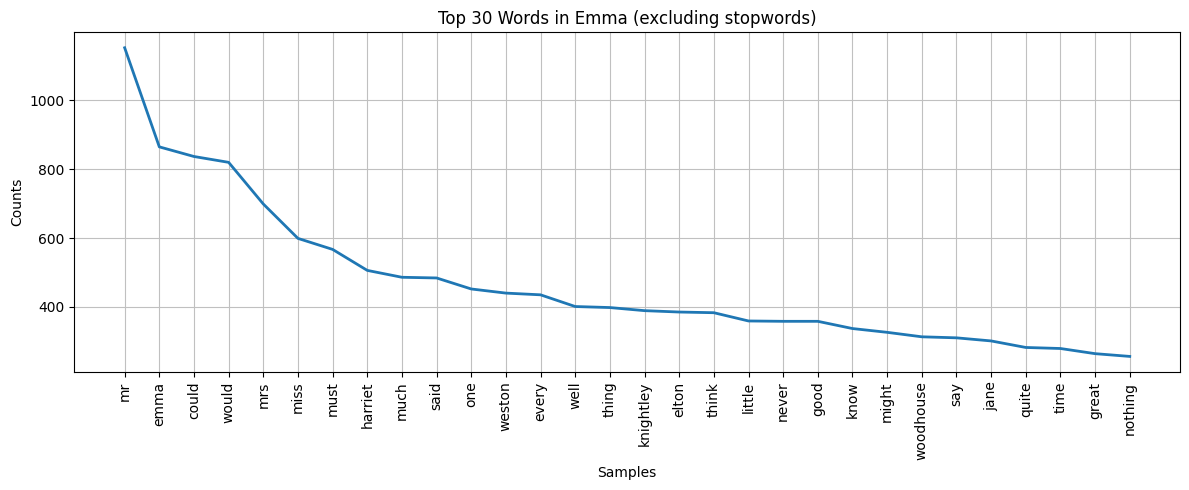

In [11]:
import matplotlib.pyplot as plt

# Plot most common words
plt.figure(figsize=(12, 5))

fdist_filtered.plot(30, title="Top 30 Words in Emma (excluding stopwords)")
plt.tight_layout()
plt.show()

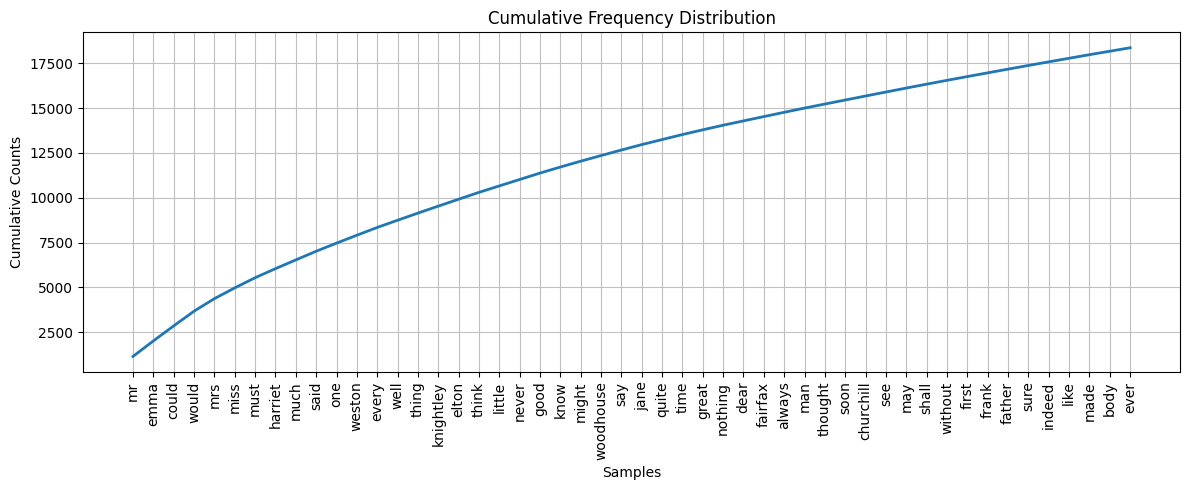

In [12]:
# Cumulative frequency plot
plt.figure(figsize=(12, 5))

fdist_filtered.plot(50, cumulative=True, 
                    title="Cumulative Frequency Distribution")
plt.tight_layout()
plt.show()

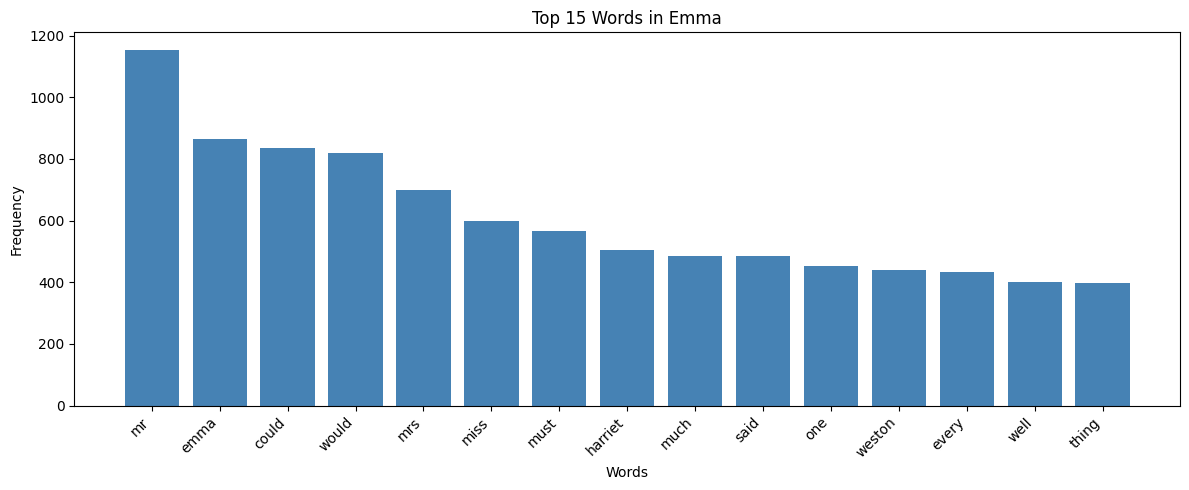

In [13]:
# Custom bar chart
top_words = fdist_filtered.most_common(15)
words = [w for w, c in top_words]
counts = [c for w, c in top_words]

plt.figure(figsize=(12, 5))
plt.bar(words, counts, color='steelblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in Emma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 11.5 Conditional Frequency Distribution

**ConditionalFreqDist** tracks frequencies for different conditions/categories.

In [14]:
# Word frequency by genre in Brown corpus
cfd = ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
    if word.isalpha()
)

print(f"Conditions (genres): {cfd.conditions()}")

Conditions (genres): ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [15]:
# Compare word usage across genres
target_words = ['love', 'money', 'government', 'science', 'god']
genres = ['romance', 'news', 'religion', 'science_fiction']

print("Word Frequency by Genre")
print("=" * 60)
print(f"{'Word':<12}", end='')
for genre in genres:
    print(f"{genre:<15}", end='')
print()
print("-" * 60)

for word in target_words:
    print(f"{word:<12}", end='')
    for genre in genres:
        print(f"{cfd[genre][word]:<15}", end='')
    print()

Word Frequency by Genre
Word        romance        news           religion       science_fiction
------------------------------------------------------------
love        36             3              13             4              
money       24             30             2              0              
government  10             73             5              2              
science     6              10             12             1              
god         28             8              136            5              


In [16]:
# Tabulate for cleaner output
cfd.tabulate(conditions=genres, samples=target_words)

                      love      money government    science        god 
        romance         36         24         10          6         28 
           news          3         30         73         10          8 
       religion         13          2          5         12        136 
science_fiction          4          0          2          1          5 


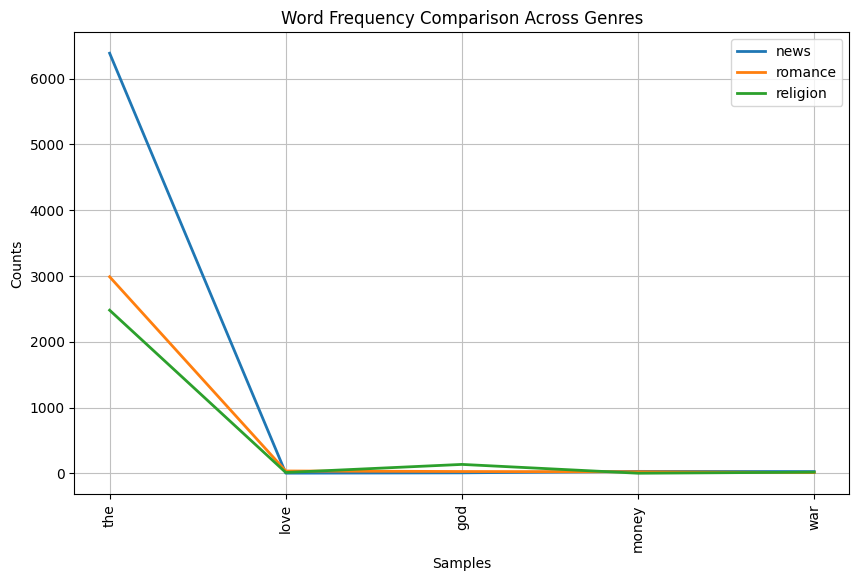

In [18]:
# Plot conditional frequency
plt.figure(figsize=(10, 6))
cfd.plot(conditions=['news', 'romance', 'religion'], 
         samples=['the', 'love', 'god', 'money', 'war'])
plt.title('Word Frequency Comparison Across Genres')
plt.show()

## 11.6 Inaugural Address Analysis

In [17]:
# Word usage over time in inaugural addresses
cfd_inaugural = ConditionalFreqDist(
    (fileid[:4], word.lower())  # Year is first 4 chars
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    if word.isalpha()
)

print(f"Years available: {list(cfd_inaugural.conditions())[:10]}...")

Years available: ['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825']...


In [19]:
# Track specific words over time
target_words = ['america', 'citizen', 'freedom', 'war', 'peace']
years = [str(y) for y in range(1900, 2021, 20)]

print("Word Usage in Inaugural Addresses (1900-2020)")
print("=" * 70)
cfd_inaugural.tabulate(conditions=years, samples=target_words)

Word Usage in Inaugural Addresses (1900-2020)
     america citizen freedom     war   peace 
1900       0       0       0       0       0 
1920       0       0       0       0       0 
1940       0       0       0       0       0 
1960       0       0       0       0       0 
1980       0       0       0       0       0 
2000       0       0       0       0       0 
2020       0       0       0       0       0 


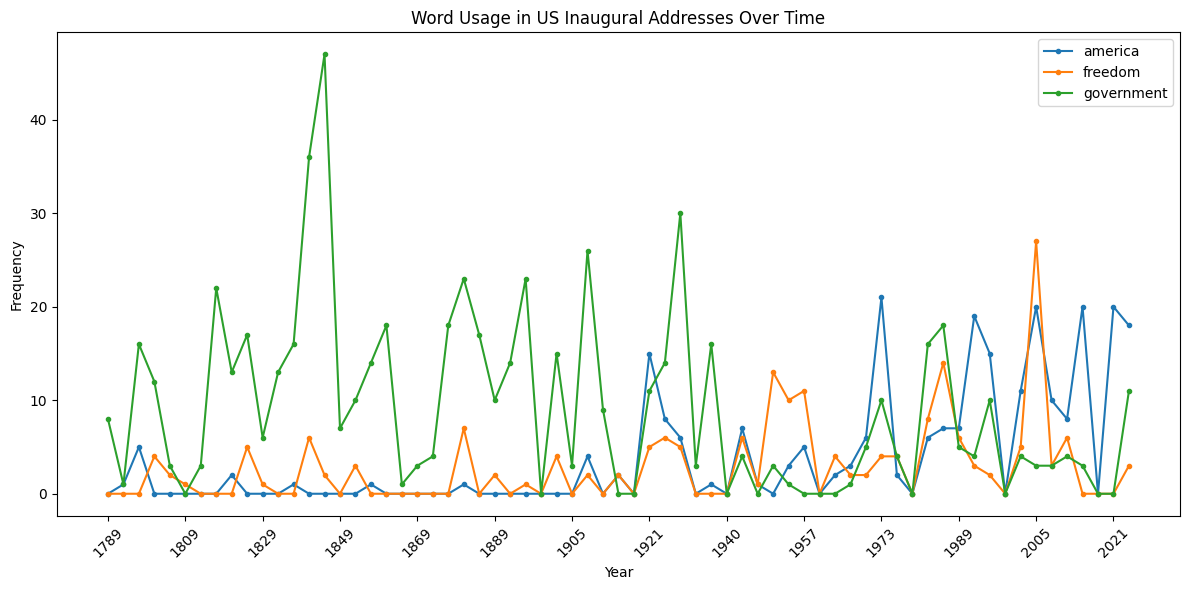

In [20]:
# Plot word trends
plt.figure(figsize=(12, 6))

years = sorted(cfd_inaugural.conditions())
words_to_track = ['america', 'freedom', 'government']

for word in words_to_track:
    freqs = [cfd_inaugural[year][word] for year in years]
    plt.plot(years, freqs, marker='o', label=word, markersize=3)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage in US Inaugural Addresses Over Time')
plt.legend()
plt.xticks(years[::5], rotation=45)
plt.tight_layout()
plt.show()

## 11.7 Practical: Text Statistics Class

In [21]:
class TextStatistics:
    """Comprehensive text frequency analysis"""
    
    def __init__(self, text, remove_stopwords=True):
        self.raw_text = text
        self.tokens = word_tokenize(text.lower())
        self.words = [w for w in self.tokens if w.isalpha()]
        
        if remove_stopwords:
            stop_words = set(stopwords.words('english'))
            self.words = [w for w in self.words if w not in stop_words]
        
        self.fdist = FreqDist(self.words)
    
    def summary(self):
        """Get summary statistics"""
        return {
            'total_words': self.fdist.N(),
            'unique_words': self.fdist.B(),
            'lexical_diversity': self.fdist.B() / self.fdist.N(),
            'hapaxes': len(self.fdist.hapaxes()),
            'avg_word_length': sum(len(w) for w in self.words) / len(self.words),
        }
    
    def top_words(self, n=10):
        """Get top n words"""
        return self.fdist.most_common(n)
    
    def word_lengths(self):
        """Distribution of word lengths"""
        return FreqDist(len(w) for w in self.words)
    
    def search(self, word):
        """Get frequency and rank of a word"""
        freq = self.fdist[word]
        if freq == 0:
            return {'word': word, 'frequency': 0, 'rank': None}
        
        rank = sorted(self.fdist.values(), reverse=True).index(freq) + 1
        return {
            'word': word,
            'frequency': freq,
            'rank': rank,
            'percentage': self.fdist.freq(word)
        }

In [22]:
# Use the class
emma_text = gutenberg.raw('austen-emma.txt')
stats = TextStatistics(emma_text)

print("Emma - Text Statistics")
print("=" * 40)

summary = stats.summary()
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value:,}")

Emma - Text Statistics
total_words: 69,689
unique_words: 6,808
lexical_diversity: 0.0977
hapaxes: 2,683
avg_word_length: 6.0348


In [23]:
print("\nTop 15 Words:")
print("-" * 25)
for word, count in stats.top_words(15):
    print(f"{word:<15} {count:>6}")


Top 15 Words:
-------------------------
emma               860
could              836
would              818
miss               599
must               566
harriet            500
much               484
said               483
one                447
weston             437
every              435
thing              394
think              383
elton              383
knightley          379


In [24]:
# Search for specific words
for word in ['emma', 'love', 'happy', 'marriage']:
    result = stats.search(word)
    print(f"{word}: freq={result['frequency']}, rank={result['rank']}")

emma: freq=860, rank=1
love: freq=117, rank=91
happy: freq=123, rank=83
marriage: freq=35, rank=400


## Summary

| Method | Description |
|--------|-------------|
| `FreqDist(samples)` | Create frequency distribution |
| `fdist.N()` | Total number of samples |
| `fdist.B()` | Number of unique samples |
| `fdist.most_common(n)` | Top n items |
| `fdist.hapaxes()` | Items appearing once |
| `fdist.freq(sample)` | Relative frequency |
| `fdist.plot()` | Plot distribution |
| `ConditionalFreqDist` | Frequency by condition |
| `cfd.tabulate()` | Tabular display |